In [855]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet
from scipy import stats
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
%matplotlib inline

In [856]:
df_train=pd.read_csv('train1.csv')
dft_test=pd.read_csv('test1.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [857]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [858]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/home/baba/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


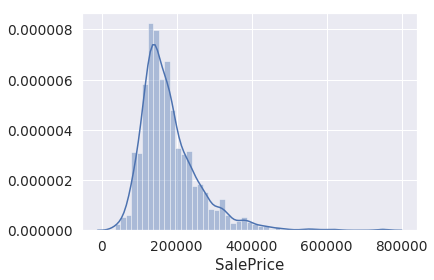

In [859]:
sns.distplot(df_train['SalePrice']);

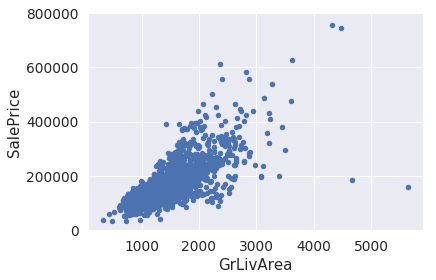

In [860]:
var='GrLivArea'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000));

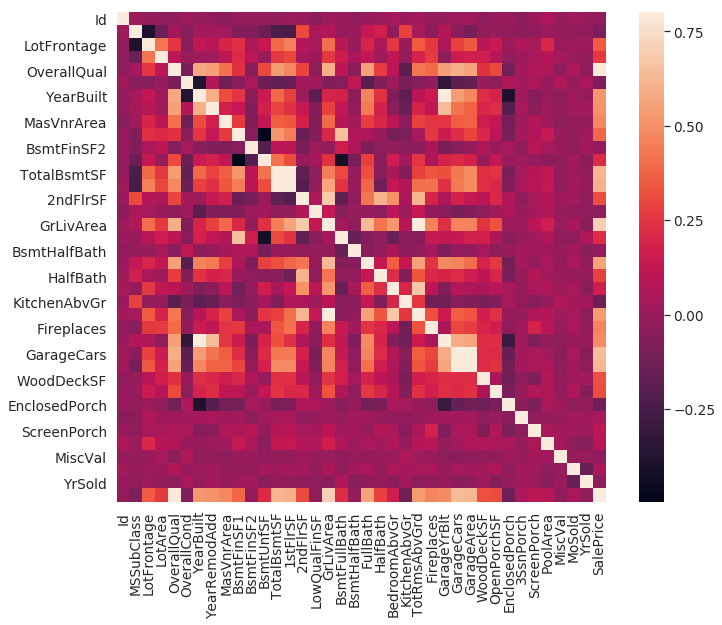

In [861]:
corrmat=df_train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)

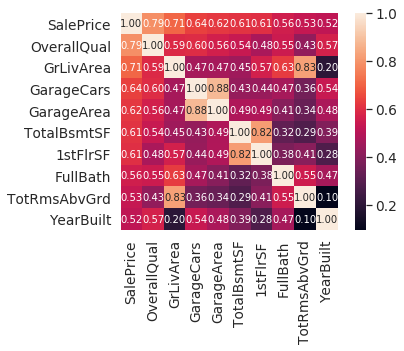

In [862]:
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [863]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total',"Percent"])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [864]:
df_train=df_train.drop((missing_data[missing_data['Total']>1]).index,1)
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [865]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

/home/baba/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


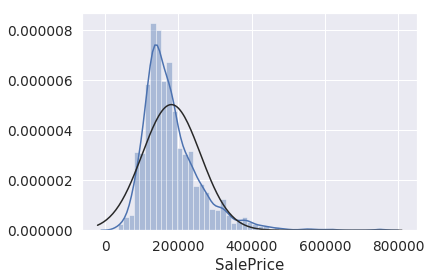

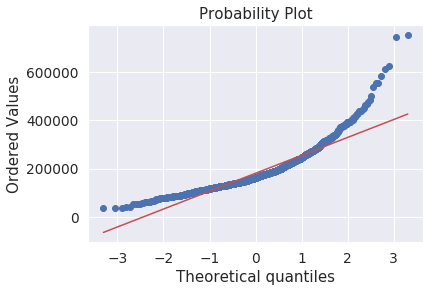

In [866]:
sns.distplot(df_train['SalePrice'],fit=norm);
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

In [867]:
df_train['SalePrice']=np.log(df_train['SalePrice'])

/home/baba/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


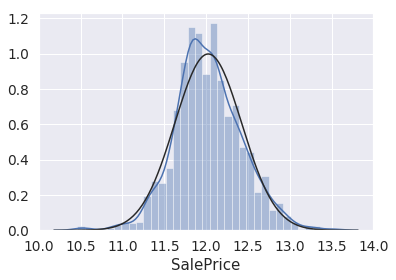

In [868]:
sns.distplot(df_train['SalePrice'],fit=norm);

/home/baba/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


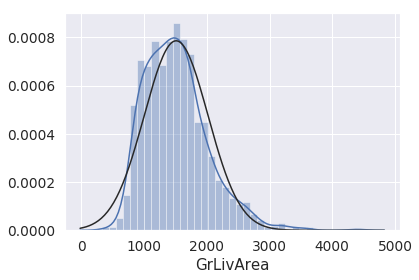

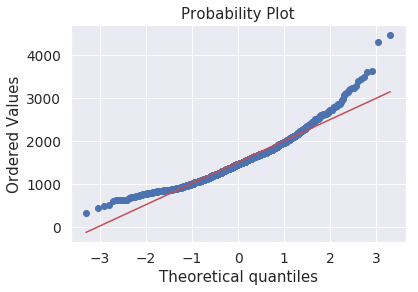

In [869]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [870]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

/home/baba/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


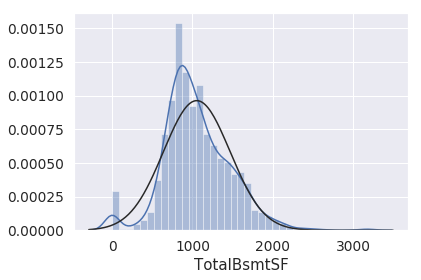

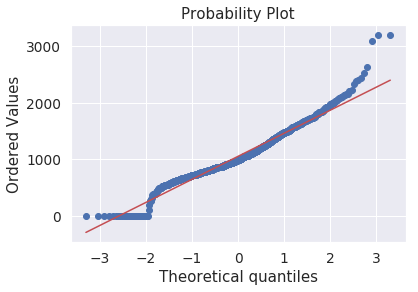

In [871]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [872]:
df_train['TotalBsmtSF'] = np.log(df_train['TotalBsmtSF']+1)

In [873]:
df_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429216


In [874]:
df_train = pd.get_dummies(df_train)
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [875]:
for each in cols:
    if(each!="SalePrice"):
       df_train[each+"1"]=df_train[each]**3    
X=df_train.drop(['Id','SalePrice'],axis=1)
Y=df_train['SalePrice']

In [876]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2)

In [877]:
reg=LinearRegression()
reg.fit(X_train,Y_train)
predict2=reg.predict(X_val)
predict3=reg.predict(X_train)

In [878]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, Y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, Y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
y_predict=ridge.predict(X_val)
y_predict1=ridge.predict(X_train)

Best alpha : 10.0
Try again for more precision with alphas centered around 10.0


/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.411473e-22
  overwrite_a=True).T
/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.726215e-22
  overwrite_a=True).T
/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.441101e-22
  overwrite_a=True).T
/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.717428e-22
  over

/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.728946e-22
  overwrite_a=True).T
/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.446313e-22
  overwrite_a=True).T
/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.077060e-22
  overwrite_a=True).T
/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.163471e-22
  over

/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.897003e-22
  overwrite_a=True).T
/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.804526e-22
  overwrite_a=True).T
/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.112449e-22
  overwrite_a=True).T
/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.496261e-22
  over

Best alpha : 12.5


/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.288288e-21
  overwrite_a=True).T
/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.068635e-21
  overwrite_a=True).T
/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.886550e-22
  overwrite_a=True).T
/home/baba/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.775950e-22
  over

In [879]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train,Y_train)
my_model.score(X_val,Y_val)

0.8989387948887938

In [880]:
model=RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_val,Y_val)

0.8565887053447481

In [ ]:
en=ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
en.fit(X_train,Y_train)
en.score(X_val,Y_val)

In [ ]:
reg.score(X_val,Y_val)

In [ ]:
ridge.score(X_val,Y_val)

In [ ]:
def rmse(y,y_pred):
    return (np.sqrt(sum((y-y_pred)**2)/len(y)))

In [ ]:
predict2=np.exp(predict2)

In [ ]:
Y_val=np.exp(Y_val)

In [ ]:
print(rmse(Y_val,predict2))

In [ ]:
print(rmse(Y_train,predict3))

In [ ]:
y_predict=np.exp(y_predict)
print(rmse(Y_val,y_predict))


In [ ]:
print(rmse(Y_train,y_predict1))

In [ ]:
dft_test.head()

In [ ]:
total_t=dft_test.isnull().sum().sort_values(ascending=False)
percent_t=(dft_test.isnull().sum()/dft_test.isnull().count()).sort_values(ascending=False)
missing_data1=pd.concat([total_t,percent_t],axis=1,keys=['total_t','percent_t'])
missing_data1.head(40)

In [ ]:
dft_test=dft_test.drop((missing_data1[missing_data1['total_t']>14]).index,1)
dft_test.fillna({
    'BsmtFinSF1':np.median(dft_test['BsmtFinSF1'].dropna()),
    'BsmtFinSF2':np.median(dft_test['BsmtFinSF2'].dropna()),
    'BsmtHalfBath':np.median(dft_test['BsmtHalfBath'].dropna()),
    'BsmtFullBath':np.median(dft_test['BsmtFullBath'].dropna()),
    'GarageArea':np.median(dft_test['GarageArea'].dropna()),
    'GarageCars':np.median(dft_test['GarageCars'].dropna()),
    'KitchenQual':'Gd',
    'Exterior1st':'vinylSd',
    'SaleType':'WD',
    'TotalBsmtSF':np.median(dft_test['TotalBsmtSF'].dropna()),
    'BsmtUnfSF':np.median(dft_test['BsmtUnfSF'].dropna()),
    'Exterior2nd':'vinylSd',
    'Functional':'Typ',
    'Utilities':'ALLPub',
    'MSZoning':'RL'
},inplace=True)
dft_test['GrLivArea'] = np.log(dft_test['GrLivArea'])

In [ ]:
dft_test['TotalBsmtSF'] = np.log(dft_test['TotalBsmtSF']+1)

In [ ]:
dft_test=pd.get_dummies(dft_test)
for each in cols:
    if(each!="SalePrice"):
       dft_test[each+"1"]=dft_test[each]**3  

In [ ]:
# Get missing columns in the training test
missing_cols = set( df_train.columns ) - set(dft_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    dft_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
dft_test = dft_test[df_train.columns]

In [ ]:
X_test=dft_test.drop(['Id','SalePrice'],axis=1)

In [ ]:
predict1=en.predict(X_test)

In [ ]:
predict1=np.exp(predict1)
predict1

In [ ]:

submission = pd.DataFrame({
        'Id': dft_test['Id'],
        'SalePrice': predict1
    })

In [ ]:
submission.to_csv('submission.csv',index=False)